## Import libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [4]:
dataset_dir = r'C:\Users\P Alekhya\Downloads\archive\Quad Leaders'

## Scaling and Splitting data

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,        
    rotation_range=20,     
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
    validation_split=0.2   
)

In [7]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),  
    batch_size=16,           
    class_mode='categorical',
    subset='training'        
)

Found 2034 images belonging to 4 classes.


In [8]:
train_generator.class_indices

{'Fumio Kishida': 0, 'Joe Biden': 1, 'Narendra Modi': 2, 'Scott Morrison': 3}

In [9]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'       
)

Found 508 images belonging to 4 classes.


In [10]:
validation_generator.class_indices

{'Fumio Kishida': 0, 'Joe Biden': 1, 'Narendra Modi': 2, 'Scott Morrison': 3}

## convolution and maxpooling

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


## Flattening

In [15]:
model.add(Flatten())

## Neural Network

In [17]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

## Model compiling

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 35, 35, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,994,756 (72.46 MB)

 Trainable params: 18,994,756 (72.46 MB)

 Non-trainable params: 0 (0.00 B)

## model fitting

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

In [24]:
history = model.fit(
    train_generator,
    epochs=30, 
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 63s 471ms/step - accuracy: 0.3050 - loss: 1.5962 - val_accuracy: 0.4626 - val_loss: 1.1915
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 62s 476ms/step - accuracy: 0.4347 - loss: 1.1945 - val_accuracy: 0.5000 - val_loss: 1.1271
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 65s 506ms/step - accuracy: 0.5035 - loss: 1.1311 - val_accuracy: 0.5354 - val_loss: 1.0946
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 59s 459ms/step - accuracy: 0.5137 - loss: 1.1499 - val_accuracy: 0.5118 - val_loss: 1.0524
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 61s 476ms/step - accuracy: 0.5520 - loss: 1.0251 - val_accuracy: 0.5787 - val_loss: 1.0125
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 65s 501ms/step - accuracy: 0.5576 - loss: 1.0335 - val_accuracy: 0.6161 - val_loss: 0.9704
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 63s 485ms/step - accuracy: 0.5831 - loss: 0.9856 - val_accuracy: 0.5807 - val_loss: 0.9717
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 64s 498ms/step - accuracy: 0.6197 - loss: 0

## Evaluation

In [26]:
train_loss,train_accuracy=model.evaluate(train_generator)
test_loss,test_accuracy=model.evaluate(validation_generator)

128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.8355 - loss: 0.4504
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7780 - loss: 0.6168


In [27]:
print(f'train accuracy:{train_accuracy*100:.2f}%')
print(f'test accuracy:{test_accuracy*100:.2f}%')

train accuracy:83.14%
test accuracy:76.38%


## save model

In [62]:
model.save('Quadleaders.h5')

## model prediction

In [56]:
filepaths = [
    r"C:\Users\P Alekhya\Downloads\archive\Quad Leaders\Fumio Kishida\FumioKishida15.jpg",
    r"C:\Users\P Alekhya\Downloads\archive\Quad Leaders\Joe Biden\JoeBiden99.jpg",
    r"C:\Users\P Alekhya\Downloads\archive\Quad Leaders\Narendra Modi\NarendraModi0_c.jpg",
    r"C:\Users\P Alekhya\Downloads\archive\Quad Leaders\Scott Morrison\ScottMorrison14_c.jpg"
]

In [58]:
leaders = ['FuminoKishida', 'Joe Biden', 'Narendra Modi', 'Scott Morrison']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


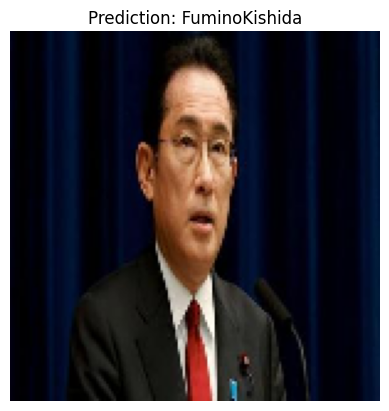

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


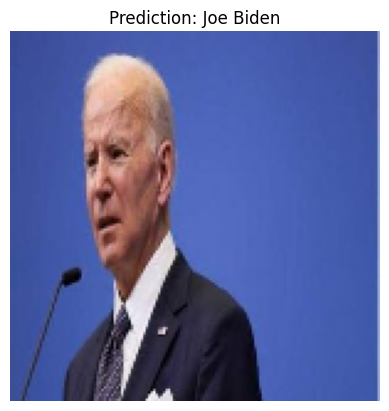

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


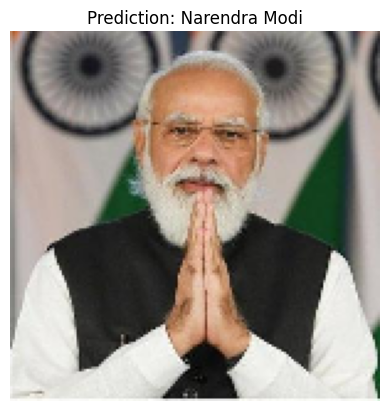

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


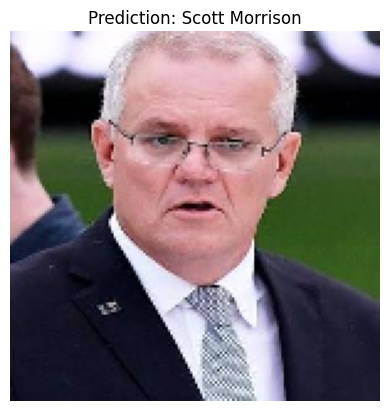

In [60]:
for filepath in filepaths:
    img = image.load_img(filepath, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    
    prediction = model.predict(img_array)

    prediction_class_index = np.argmax(prediction, axis=1)[0]


    prediction_class_label = leaders[prediction_class_index]


    plt.imshow(img)
    plt.title(f"Prediction: {prediction_class_label}")
    plt.axis('off')  
    plt.show()
    